In [25]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
#import nba
import sys
sys.path.append("/mnt/home/ecunningham/python")
sys.path.append("../scripts/src/")

#import pynbody
import pynbody_routines as pr
import gizmo_analysis as ga

from matplotlib import colors
import halo_analysis as halo
import io_gizmo_pynbody as fa
import itertools

from scipy.linalg import norm
#import analysis as fa
import pynbody
from scipy.linalg import norm
import nba

In [8]:
plt.rcParams['text.usetex'] = False

In [97]:
sim_directory = '/mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/'

In [274]:
m12b_subhalos = halo.halo_io.IO.read_catalogs('index', 600, sim_directory)


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000

* read 35833 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/halo/rockstar_dm/catalog_hdf5/halo_600.hdf5

# in halo_analysis.halo_io.Particle():
* read 35833 halos, 33 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/halo/rockstar_dm/catalog_hdf5/star_600.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished



In [275]:
subhalos_pos = m12b_subhalos['host.distance']
subhalos_vel = m12b_subhalos['host.velocity']
subhalos_infall = m12b_subhalos['infall.snapshot']
subhalos_finall = m12b_subhalos['infall.first.snapshot']
star_mass = m12b_subhalos['star.mass']
dm_mass = m12b_subhalos['mass.peak']

/tmp/ipykernel_678668/857799069.py:1: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(dm_mass))


(array([3.1600e+02, 1.4622e+04, 1.0855e+04, 4.1090e+03, 1.0550e+03,
        2.7600e+02, 4.2000e+01, 1.8000e+01, 6.0000e+00, 3.0000e+00]),
 array([ 5.02342272,  5.71960163,  6.41578102,  7.11195993,  7.80813885,
         8.50431824,  9.20049667,  9.89667606, 10.59285545, 11.28903389,
        11.98521328]),
 <BarContainer object of 10 artists>)

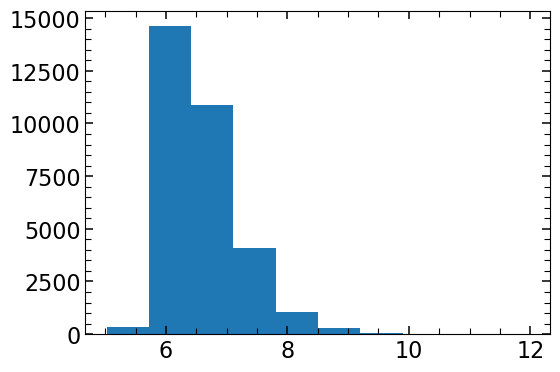

In [276]:
plt.hist(np.log10(dm_mass))

In [277]:
satellites = np.where(star_mass!=-1)

(-500.0, 500.0)

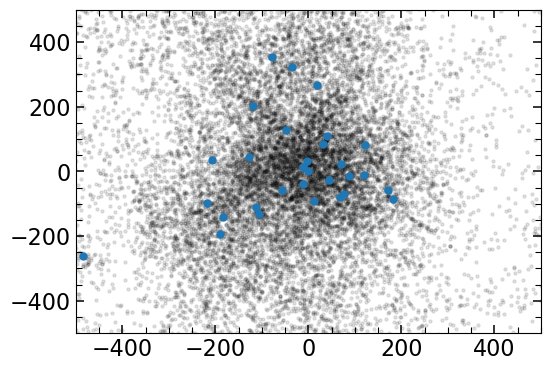

In [278]:
plt.scatter(subhalos_pos[:,0], subhalos_pos[:,1], c='k', s=5, alpha=0.1)
plt.scatter(subhalos_pos[satellites,0], subhalos_pos[satellites,1])
plt.xlim(-500, 500)
plt.ylim(-500, 500)

In [279]:
dist = norm(subhalos_pos, axis=1)
rcut = np.where((dist<200) & (dist>0) & (dm_mass>1e8))
print(len(rcut[0]))

136


In [280]:
subhalos_pos_in = m12b_subhalos['host.distance'][rcut]
subhalos_vel_in = m12b_subhalos['host.velocity'][rcut]
subhalos_infall_in = m12b_subhalos['infall.snapshot'][rcut]
subhalos_finfall_in = m12b_subhalos['infall.first.snapshot'][rcut]

In [281]:
subhalos_kin = nba.kinematics.Kinematics(subhalos_pos_in, subhalos_vel_in)

In [282]:
op_l, op_b = subhalos_kin.orbpole()

In [285]:
times = '/mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/snapshot_times.txt'
t_snap = np.loadtxt(times, usecols=3)

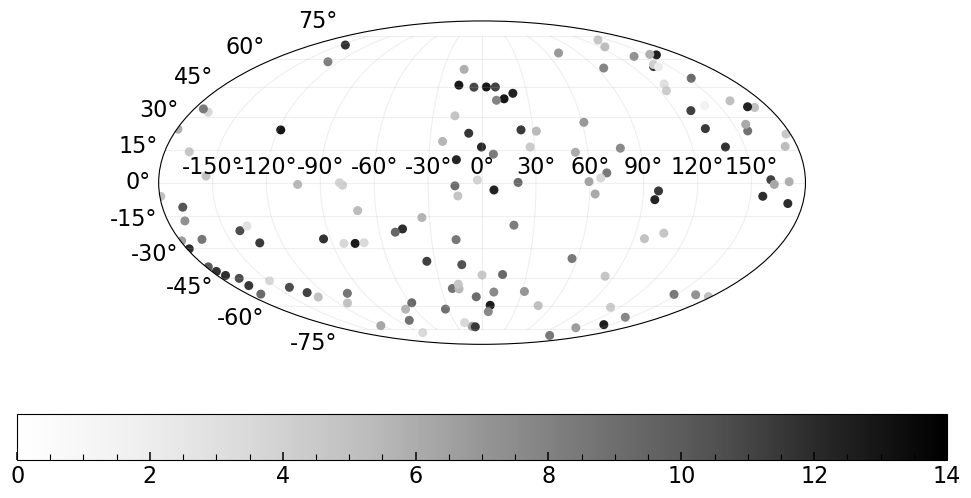

In [293]:
plt.figure(figsize=(12,6))
plt.subplot(projection="mollweide")
plt.scatter(op_l*np.pi/180, op_b*np.pi/180, s=30, c=t_snap[subhalos_infall_in], vmin=0, vmax=14, cmap='Greys')
plt.grid(alpha=0.2)
cbar = plt.colorbar(orientation='horizontal')



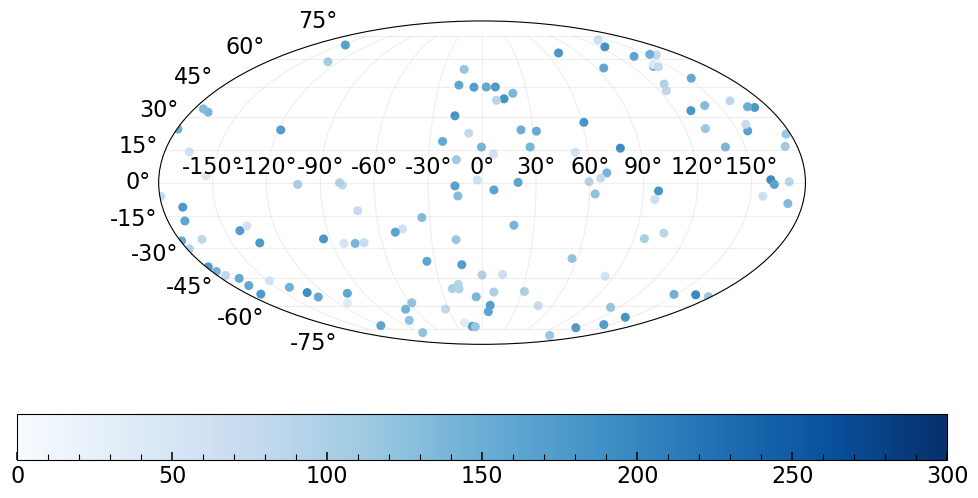

In [284]:
plt.figure(figsize=(12,6))
plt.subplot(projection="mollweide")
plt.scatter(op_l*np.pi/180, op_b*np.pi/180, s=30, c=dist[rcut], vmin=0, vmax=300, cmap='Blues')
plt.grid(alpha=0.2)
cbar = plt.colorbar(orientation='horizontal')

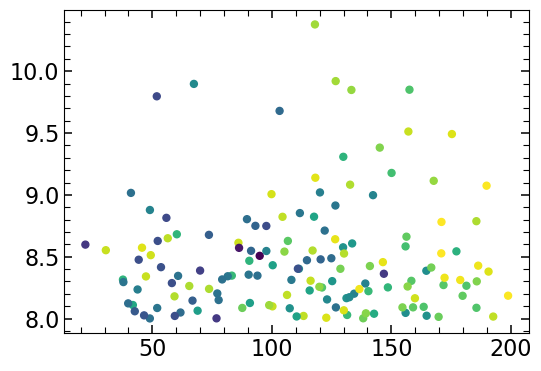

In [273]:
plt.scatter(dist[rcut], np.log10(dm_mass[rcut]), c=subhalos_infall_in)

In [178]:
m12b_subhalos.keys()

dict_keys(['accrete.rate', 'accrete.rate.100Myr', 'accrete.rate.tdyn', 'am.phantom', 'am.progenitor.main', 'axis.b/a', 'axis.c/a', 'descendant.snapshot', 'host.distance', 'host.index', 'host.velocity', 'host.velocity.rad', 'host.velocity.tan', 'id', 'infall.first.mass', 'infall.first.snapshot', 'infall.first.vel.circ.max', 'infall.mass', 'infall.snapshot', 'infall.vel.circ.max', 'major.merger.snapshot', 'mass', 'mass.180m', 'mass.200c', 'mass.200m', 'mass.500c', 'mass.bound', 'mass.half.snapshot', 'mass.lowres', 'mass.peak', 'mass.peak.snapshot', 'mass.vir', 'position', 'position.offset', 'progenitor.number', 'radius', 'scale.radius', 'scale.radius.klypin', 'spin.bullock', 'spin.peebles', 'tree.index', 'vel.circ.max', 'vel.circ.peak', 'vel.std', 'velocity', 'velocity.offset', 'dark2.mass', 'star.form.time.100', 'star.form.time.50', 'star.form.time.90', 'star.form.time.95', 'star.form.time.dif.68', 'star.indices', 'star.mass', 'star.massfraction', 'star.number', 'star.position', 'star.r

In [179]:
m12b_host_all = fa.FIRE('m12r', remove_satellite=False)

In [19]:
subh_m12b = m12b_host.subhalos_rotated(300)


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/output/snapdir_300/snapshot_300.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 60327928 particles
    dark2     (id = 2): 6226512 particles
    gas       (id = 0): 58734928 particles
    star      (id = 4): 1605128 particles
    blackhole (id = 5): 0 particles

* reading species: ['dark', 'star']
* reading particles from:
    snapshot_300.0.hdf5
    snapshot_300.1.hdf5
    snapshot_300.2.hdf5
    snapshot_300.3.hdf5

! cannot find MUSIC config file:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/*/*.conf
! missing cosmological parameters, assuming the following (from AGORA):
  assuming omega_baryon = 0.0455
  assuming sigma_8 = 0.807
  assuming n_s = 0.961

*


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/output/snapdir_300/snapshot_300.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 60327928 particles
    dark2     (id = 2): 6226512 particles
    gas       (id = 0): 58734928 particles
    star      (id = 4): 1605128 particles
    blackhole (id = 5): 0 particles

* reading species: ['dark', 'star']
* reading particles from:
    snapshot_300.0.hdf5
    snapshot_300.1.hdf5
    snapshot_300.2.hdf5
    snapshot_300.3.hdf5

! cannot find MUSIC config file:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/*/*.conf
! missing cosmological parameters, assuming the following (from AGORA):
  assuming omega_baryon = 0.0455
  assuming sigma_8 = 0.807
  assuming n_s = 0.961

*

(-500.0, 500.0)

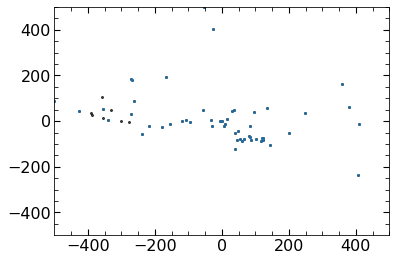

In [21]:
plt.scatter(subh_m12b_all[0].star['pos'][:,0], subh_m12b_all[0].star['pos'][:,1], c='k', s=4, alpha=0.7)
plt.scatter(subh_m12b[0].star['pos'][:,0], subh_m12b[0].star['pos'][:,1], c='C0', s=4, alpha=0.7)
plt.xlim(-500, 500)
plt.ylim(-500, 500)

(-500.0, 500.0)

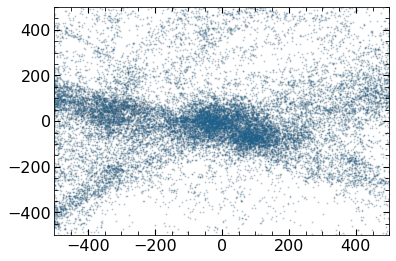

In [22]:
plt.scatter(subh_m12b_all[0].dark['pos'][:,0], subh_m12b_all[0].dark['pos'][:,1], c='k', s=1, alpha=0.1)
plt.scatter(subh_m12b[0].dark['pos'][:,0], subh_m12b[0].dark['pos'][:,1], c='C0', s=1, alpha=0.1)
plt.xlim(-500, 500)
plt.ylim(-500, 500)

In [9]:
len(subh_m12b_all.star['pos'][:,0])

96

In [10]:
len(subh_m12b.star['pos'][:,0])

88

In [ ]:
sim = 'm12b'
m12_subhalos = halo.io.IO.read_catalogs('snapshot', 400,
                                        "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/".format(sim))

In [ ]:
halt = halo.io.IO.read_tree(simulation_directory="/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/".format(sim))


In [ ]:
 subhalos_ids = m12b_host.get_catids_satsubhalos()

In [ ]:
subhalos_snap = subhalos_ids[400-300]
print(len(subhalos_snap), len(m12_subhalos['mass']))
hsub = pr.pynbody_subhalos(m12_subhalos, mask=subhalos_snap)
hsub_faceon = hsub


In [ ]:
len(hsub_faceon.star['mass'])

In [ ]:
particles = m12_subhalos
mask = subhalos_snap
ndark_init = len(particles['mass'])
mask_clean = mask[mask>=0]
print(len(np.unique(mask_clean)), len(mask_clean))
mask_clean = np.unique(mask_clean)
ndark = ndark_init - len(mask_clean)
mask_array = np.ones(ndark_init, dtype=bool)
mask_array[mask_clean] = 0


In [ ]:
m12_subhalos['mass'][mask_array]['stars']

In [ ]:
len(mask_array)

In [ ]:
len(m12_subhalos['star.number'][mask_array])

In [ ]:
stars = np.where(m12_subhalos['star.number'][mask_array]!=-1)[0]
len(stars)

In [82]:
stars = np.where(m12_subhalos['mass'][mask_array]['star.number']!=-1)[0]
len(stars)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices